# Ejercicios Prácticos - Ciencia de datos

##### II DIPLOMA DE EXPERTO EN APRENDIZAJE AUTOMÁTICO AVANZADO EN PYTHON
#### Alumno: Pablo Fazio Arrabal

---

## Ejercicios Básicos

1. Imagina que estás trabajando con un sistema de análisis de ventas de productos en una tienda. Los datos de las ventas se encuentran en una matriz ndarray que representa las ventas mensuales de 5 productos durante los últimos 6 meses. Cada fila de la matriz corresponde a un producto, y cada columna corresponde a un mes. Utiliza esta matriz de ejemplo:

    ```
    [100, 150, 200, 130, 170, 160],
    [90, 110, 160, 140, 190, 210],
    [120, 130, 180, 190, 220, 210],
    [80, 85, 100, 90, 110, 120],
    [75, 80, 95, 100, 105, 110]
    ```

    Realiza las siguientes tareas mostrando por pantalla el resultado de cada uno de los apartados:

    **a)** Accede a las ventas del tercer producto en el segundo mes. Extrae las ventas de los primeros 3 productos en el segundo y cuarto mes.

    **b)** Aumenta en 50% las ventas del producto 2 en el tercer y cuarto mes.

    **c)** Usa np.arange para generar una secuencia de valores entre 0 y 29. Redimensiona el resultado a una matriz de 5x6 e interpreta cada fila como las ventas de productos adicionales. Suma esas ventas a las ventas originales que ya teníamos.

    **d)** Calcula un array que represente en qué meses ha superado en ventas el primer producto al segundo (True en cada mes que lo supera, False en caso contrario).

    **e)** Sustituye todas las ventas inferiores a 100 por cero.

    **f)** Calcula el número de ventas acumuladas por mes (de todos los productos) y el número de ventas acumuladas por producto (de todos los meses).


In [65]:
import numpy as np

In [66]:
# En primer lugar, cargamos la matriz del enunciado como un 'ndarray' usando
# la función np.array()

# El elemento [i][j] indica las ventas del producto i-ésimo en el mes j-ésimo

matriz_ventas = np.array([[100, 150, 200, 130, 170, 160],
                          [90, 110, 160, 140, 190, 210],
                          [120, 130, 180, 190, 220, 210],
                          [80, 85, 100, 90, 110, 120],
                          [75, 80, 95, 100, 105, 110]])

In [67]:
# APARTADO A)

# Basta hacer un acceso directo mediante índices [fila, columna]
# Recordar que los índices empiezan en 0 ('el tercer producto -> fila 2')

ventas_prod_3_mes_2 = matriz_ventas[2, 1]

print(f"Ventas del tercer producto en el segundo mes: {ventas_prod_3_mes_2}")

ventas_prim_prod_mes_2_4 = matriz_ventas[0:3, [1,3]]

print(f"Ventas de los tres primeros productos en los meses 2 y 4: \n {ventas_prim_prod_mes_2_4}")

Ventas del tercer producto en el segundo mes: 130
Ventas de los tres primeros productos en los meses 2 y 4: 
 [[150 130]
 [110 140]
 [130 190]]


In [68]:
# APARTADO B)

# En este ejercicio y los siguientes voy a asumir que no queremos modificar
# la matriz inicial, luego las modificaciones las haremos sobre copias suyas

matriz_ventas_mod = matriz_ventas.copy()

matriz_ventas_mod[1, [2,3]] = matriz_ventas_mod[1, [2,3]]*1.5

print(f"Aumento de un 50% en las ventas del producto 2 en el 3º y 4º mes: \n{matriz_ventas_mod}")

Aumento de un 50% en las ventas del producto 2 en el 3º y 4º mes: 
[[100 150 200 130 170 160]
 [ 90 110 240 210 190 210]
 [120 130 180 190 220 210]
 [ 80  85 100  90 110 120]
 [ 75  80  95 100 105 110]]


In [69]:
# APARTADO C)

# Generamos una secuencia lineal de 0 a 29 (recordemos que pasamos como
# parámetro el punto final del intervalo [0, 30), luego no alcanzamos este valor)

secuencia = np.arange(30)

# Uso la función reshape(filas, columnas) para que coincida con la matriz
# original.

# NOTA: La secuencia DEBE tener 30 (5x6) elementos, pues si no nos dará error
# de formateado

matriz_ventas_adicionales = secuencia.reshape(5, 6)

# Suma elemento a elemento

matriz_ventas_new = matriz_ventas + matriz_ventas_adicionales

print(f"Suma de nuevas ventas adicionales: \n{matriz_ventas_new}")

Suma de nuevas ventas adicionales: 
[[100 151 202 133 174 165]
 [ 96 117 168 149 200 221]
 [132 143 194 205 236 227]
 [ 98 104 120 111 132 143]
 [ 99 105 121 127 133 139]]


In [70]:
# APARTADO D)

# Comparación directa entre dos filas completas elemento a elemento
# Devolvemos un array de booleanos ('True' o 'False') indicando en que mes
# se cumple la condición.

print(matriz_ventas[0] > matriz_ventas[1])

[ True  True  True False False False]


Interpretando el resultado impreso por pantalla, podemos ver que en los tres primeros meses el *producto 1* supera en ventas al *producto 2* y en los tres siguientes meses al contrario.

In [71]:
# APARTADO E)

matriz_ventas_copy = matriz_ventas.copy()

# Usamos la propia condición como "máscara booleana" para filtrar valores y
# asignamos dichos valores a 0

matriz_ventas_copy[matriz_ventas_copy < 100] = 0

print(matriz_ventas_copy)

[[100 150 200 130 170 160]
 [  0 110 160 140 190 210]
 [120 130 180 190 220 210]
 [  0   0 100   0 110 120]
 [  0   0   0 100 105 110]]


In [72]:
# APARTADO F)

# Usamos la función np.sum() y controlamos con el parámetro 'axis'
# la suma por filas o por columnas

ventas_acumuladas_mes = matriz_ventas.sum(axis=0)

ventas_acumuladas_producto = matriz_ventas.sum(axis=1)

print("Ventas acumuladas por mes:", ventas_acumuladas_mes)
print("Ventas acumuladas por producto:", ventas_acumuladas_producto)

Ventas acumuladas por mes: [465 555 735 650 795 810]
Ventas acumuladas por producto: [ 910  900 1050  585  565]


2. Eres un analista de datos trabajando para una tienda minorista que ha recopilado datos de ventas en un archivo CSV. El archivo contiene información sobre las ventas de varios productos en diferentes tiendas durante el último trimestre. Tu tarea es leer los datos, analizarlos y extraer conclusiones clave sobre el rendimiento de las ventas.

    Realiza las siguientes tareas mostrando el resultado de cada apartado por pantalla, debes usar las funciones de pandas adecuadas en cada caso:

    **a)** Utiliza la biblioteca pandas para leer el archivo CSV llamado *ventas_tienda.csv* que se adjunta en esta tarea del Campus Virtual y carga los datos en un DataFrame.

    **b)** Obtén una lista con los nombres de las columnas.

    **c)** Extrae los valores del DataFrame como un ndarray.

    **d)** Muestra las primeras 5 filas del DataFrame.

    **e)** Accede a los datos de ventas de un producto específico, por ejemplo, "Producto A", en la tienda "Tienda 1".

    **f)** Selecciona y muestra todas las filas donde la columna Cantidad sea mayor a 50 unidades vendidas.

    **g)** Calcula el total de ventas para cada tienda sumando la columna Total_Ventas.

    **h)** Muestra el producto con las mayores ventas totales en todas las tiendas.

In [73]:
import pandas as pd

In [74]:
# APARTADO A)

# Cargamos el archivo mediante la funcion read_csv()

df = pd.read_csv("/content/ventas_tienda.csv")

In [75]:
# APARTADO B)

# Usamos la función columns() del DataFrame para ver los nombres
# de las columnas de los registros

lista_nombres_columnas = df.columns.tolist()

print(lista_nombres_columnas)

['Producto', 'Tienda', 'Fecha', 'Cantidad', 'Precio', 'Total_Ventas']


In [76]:
# APARTADO C)

# Usamos la función conversión to_numpy() que nos permite convertir
# el objeto DataFrame a un ndarray

array_df = df.to_numpy()

print(array_df)

[['Producto A' 'Tienda 1' '2024-07-01' 20 10.0 200.0]
 ['Producto B' 'Tienda 1' '2024-07-01' 30 15.0 450.0]
 ['Producto C' 'Tienda 1' '2024-07-01' 15 20.0 300.0]
 ['Producto A' 'Tienda 2' '2024-07-15' 50 10.0 500.0]
 ['Producto B' 'Tienda 2' '2024-07-15' 45 15.0 675.0]
 ['Producto C' 'Tienda 2' '2024-07-15' 25 20.0 500.0]
 ['Producto A' 'Tienda 3' '2024-08-01' 10 10.0 100.0]
 ['Producto B' 'Tienda 3' '2024-08-01' 40 15.0 600.0]
 ['Producto C' 'Tienda 3' '2024-08-01' 35 20.0 700.0]
 ['Producto A' 'Tienda 1' '2024-08-15' 55 10.0 550.0]
 ['Producto B' 'Tienda 2' '2024-08-15' 60 15.0 900.0]
 ['Producto C' 'Tienda 3' '2024-08-15' 50 20.0 1000.0]]


In [77]:
# APARTADO D)

# Basta usar la función head() que por defecto ya muestra los 5 primeros registros
df.head()

,Producto,Tienda,Fecha,Cantidad,Precio,Total_Ventas
0,Producto A,Tienda 1,2024-07-01,20,10.0,200.0
1,Producto B,Tienda 1,2024-07-01,30,15.0,450.0
2,Producto C,Tienda 1,2024-07-01,15,20.0,300.0
3,Producto A,Tienda 2,2024-07-15,50,10.0,500.0
4,Producto B,Tienda 2,2024-07-15,45,15.0,675.0


In [78]:
# APARTADO E)

# Filtramos usando loc() por 'Producto A' y 'Tienda 1'

ventas_A_1 = df.loc[(df['Producto'] == 'Producto A') & (df['Tienda'] == 'Tienda 1')]

print(ventas_A_1)

     Producto    Tienda       Fecha  Cantidad  Precio  Total_Ventas
0  Producto A  Tienda 1  2024-07-01        20    10.0         200.0
9  Producto A  Tienda 1  2024-08-15        55    10.0         550.0


In [79]:
# APARTADO F)

# Como en el ejercicio anterior, usamos una 'máscara booleana'
# para seleccionar en el dataframe aquellos registros con Cantidad
# mayor que 50

cantidad_mayor_50 = df[df['Cantidad'] > 50]

print(cantidad_mayor_50)

      Producto    Tienda       Fecha  Cantidad  Precio  Total_Ventas
9   Producto A  Tienda 1  2024-08-15        55    10.0         550.0
10  Producto B  Tienda 2  2024-08-15        60    15.0         900.0


In [80]:
# APARTADO G)

# groupby() nos permite agrupar datos. En este caso mostramos las sumas
# de las ventas totales por tienda

ventas_por_tienda = df.groupby('Tienda')['Total_Ventas'].sum()

In [81]:
ventas_por_tienda

,Total_Ventas
Tienda,
Tienda 1,1500.0
Tienda 2,2575.0
Tienda 3,2400.0


In [82]:
# APARTADO H)

ventas_por_producto = df.groupby('Producto')['Total_Ventas'].sum()

# idxmax() nos devuelve el índice del máximo de ventas totales que es
# lo que buscamos imprimir por pantalla

mejor_producto = ventas_por_producto.idxmax()

print(f"El producto con las mayores ventas totales en todas las tiendas es: {mejor_producto}")

El producto con las mayores ventas totales en todas las tiendas es: Producto B


3.  Crea un gráfico que visualice varias funciones matemáticas en un mismo plano utilizando *matplotlib*. Las funciones a representar y su formato serán las siguientes:

  - Función seno $y = sin x$ (color azul, trazo continuo)
  - Función coseno $y = cos x$ (color verde, trazo discontinuo)
  - Función cuadrada $y = x^2$ (color rojo, trazo punteado)

    **a)** Dibuja las tres funciones en el mismo gráfico en un rango desde -10 hasta 10.

    **b)** Marca con un símbolo de punto negro los valores de la función $y = x^2$ para los siguientes valores de x: `[−7, −3, 0, 3, 7]`.

    **c)** Añade un título descriptivo al gráfico.

    **d)** Incluye etiquetas descriptivas.

    **e)** Añade una leyenda para identificar cada función.

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
# Definimos las funciones a representar y su dominio [-10,10]

x = np.linspace(-10, 10, 200)

y_sen = np.sin(x)
y_cos = np.cos(x)
y_pot_2 = x**2

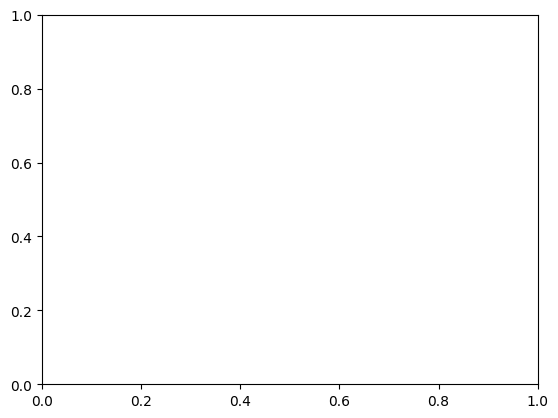

In [85]:
# Inicializamos el objeto Figure

fig, ax = plt.subplots()

In [86]:
# APARTADO A)

# Representamos las funciones en el formato (color, estilo de línea)
# requerido. Además, debemos ponerles etiquetas para que se muestren
# posteriormente en la leyenda

ax.plot(x, y_sen, color = "blue", linestyle='-', label = '$sin(x)$')

ax.plot(x, y_cos, color = "green", linestyle='--', label = '$cos(x)$')

ax.plot(x, y_pot_2, color = "red", linestyle=":", label = '$x^2$')

In [87]:
# APARTADO B)

# Dada la lista de puntos, calculamos sus cuadrados y los representamos
# como puntos de color negro

lista_puntos = np.array([-7, -3, 0, 3, 7])

puntos_y = lista_puntos**2

ax.plot(lista_puntos, puntos_y, 'o', color="black", label='Puntos $x^2$')

In [88]:
# APARTADO C), D) y E)

# Añadimos un título general y etiqueta para cada eje. Además activamos la
# visibilidad de rejillas en el gráfico

ax.set_title("Gráfico de sin(x), cos(x) y x^2")
ax.set_xlabel("Valores de x")
ax.set_ylabel("Valores de y")
ax.grid(True)

# Basta usar la función legend() y recordar poner etiquetas a las funciones
# representadas y a los puntos seleccionados

ax.legend(loc='upper center')

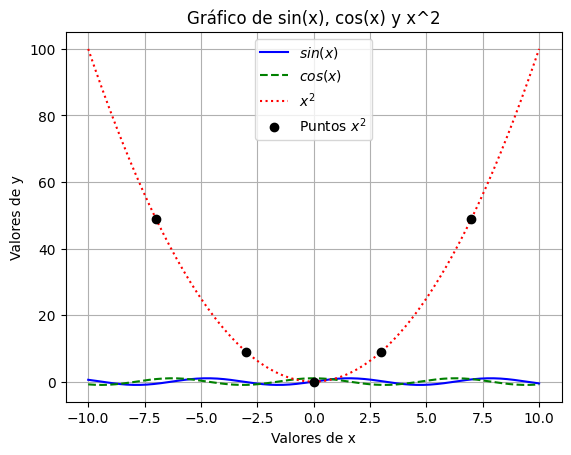

In [89]:
fig

## Ejercicio Avanzado

4.  En este ejercicio vamos a generar aleatoriamente un conjunto de datos que posteriormente procesaremos con las bibliotecas pandas y matplotlib.

    **a)** Realiza 10000 veces el siguiente proceso:

      ***i)*** Toma una matriz cuadrada A de tamaño 5x5 cuyos elementos sean elegidos aleatoriamente de la distribución normal con media 1 y desviación típica 6.

      ***ii)*** Toma un vector columna b de tamaño 5x1 cuyos elementos sean elegidos aleatoriamente de la distribución normal con media 20 y desviación típica 4.

      ***iii)*** Resuelve el sistema de ecuaciones lineales A*x = b.

      ***iv)*** Halla la media y la mediana de las 5 componentes del vector solución x. Recolecta los resultados obtenidos, es decir, 10000 valores de la media y otros 10000 valores de la mediana.

      Crea una figura con dos subfiguras. La subfigura de la izquierda debe mostrar el histograma de los valores de la media, con las barras en verde. La subfigura de la derecha mostrará el histograma de los valores de la mediana, con las barras en magenta. Añade etiquetas a los ejes horizontales de ambas subfiguras.

      **Pistas:** debes usar numpy.random.normal y numpy.linalg.solve

    **b)** Dadas las muestras recolectadas en el apartado anterior, crea un gráfico de dispersión con ellas, siendo el eje horizontal para los valores de la media, y el eje vertical para los valores de la mediana. Cada muestra debe verse como un cuadrado de color cyan. Ajusta los límites de ambos ejes para que el valor mínimo sea -1000 y el valor máximo 1000. Añade títulos a ambos ejes.

    **c)** Crea un objeto de tipo DataFrame de la biblioteca pandas con los datos recolectados. Dicho objeto debe tener una columna para las medias, y otra para las medianas.
    
    A continuación, crea un nuevo objeto de tipo DataFrame que sólo contenga las muestras del anterior DataFrame que cumplan que los valores de la media y de la mediana sean mayores que -500 y menores que 500.
    
    Por último, utiliza los datos contenidos en el segundo objeto de tipo DataFrame para crear un gráfico de dispersión. Cada muestra debe verse como un cuadrado de color cyan. Ajusta los límites de ambos ejes para que el valor mínimo sea -1000 y el valor máximo 1000. Añade títulos a ambos ejes.

    **d)** Haz una copia del objeto DataFrame original que creaste en el apartado anterior. En el nuevo objeto, establece a 500 los valores de la columna de medias que sean mayores que 500. Además, establece a 500 los valores de la columna de medianas que sean mayores que 500.
    
    Por último, utiliza los datos modificados de este último objeto de tipo DataFrame para crear un gráfico de dispersión. Cada muestra debe verse como un pequeño triángulo que apunta hacia abajo de color azul. Ajusta los límites de ambos ejes para que el valor mínimo sea -1000 y el valor máximo 1000. Añade títulos a ambos ejes.

In [90]:
# APARTADO A)

# Inicializamos los arrays que guardarán los resultados del cálculo
# de medias y medianas en cada iteración

listado_medias = []
listado_medianas = []

for _ in range(10000):

  # i) Generamos una matriz de orden 5x5 con datos aleatorios dados por una
  # normal de media 1 y desviación típica 6
  matriz_A = np.random.normal(1,6, (5,5))

  # ii) Generamos un vector de orden 5x1 con datos aleatorios dados por una
  # normal de media 20 y desviación típica 4
  vector_b = np.random.normal(20, 4, (5,1))

  # iii) Resolvemos la ecuación AX = b mediante la función solve()
  vector_X = np.linalg.solve(matriz_A, vector_b)

  # iv) Hallamos la media y la mediana de las componentes del vector y
  # las guardamos en un ndarray
  media_i = np.mean(vector_X)
  mediana_i = np.median(vector_X)

  listado_medias.append(media_i)
  listado_medianas.append(mediana_i)

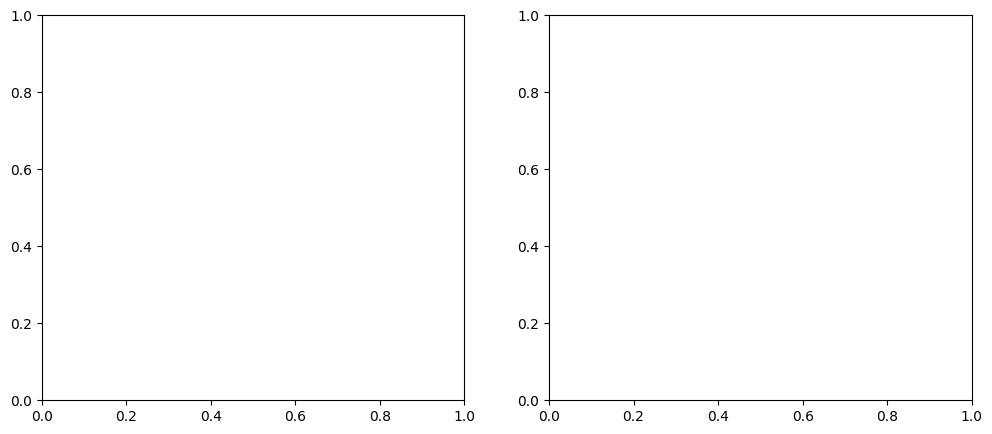

In [91]:
# Definimos el objeto Figure con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

In [92]:
# Generamos los histogramas según el formato pedido en cada subgráfica
ax1.hist(listado_medias, bins = 50, color="green")
ax1.set_xlabel("Valor de la Media")

ax2.hist(listado_medianas, bins = 50, color = "magenta")
ax2.set_xlabel("Valor de la Mediana")

Text(0.5, 4.444444444444445, 'Valor de la Mediana')

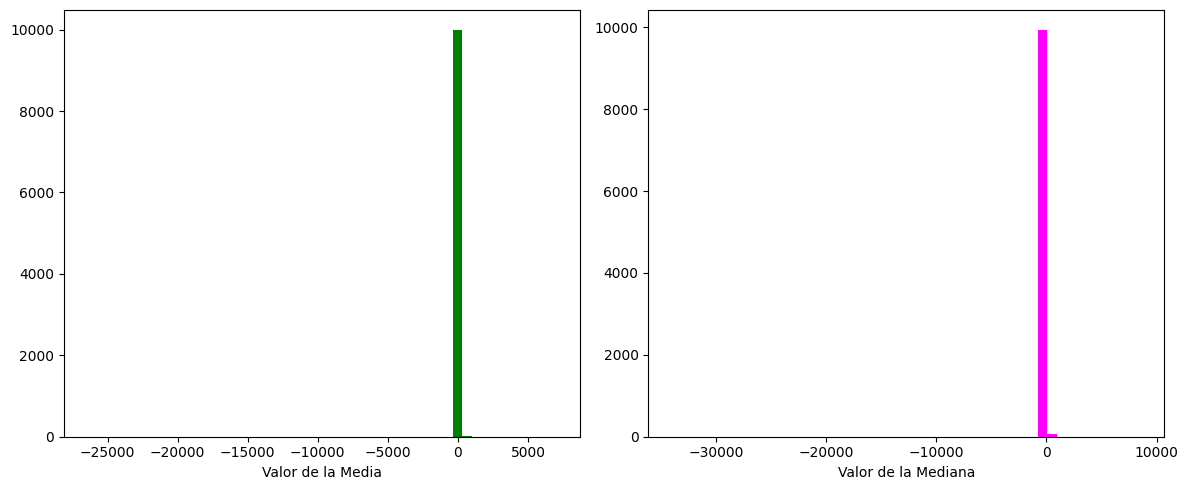

In [93]:
fig.tight_layout()
fig

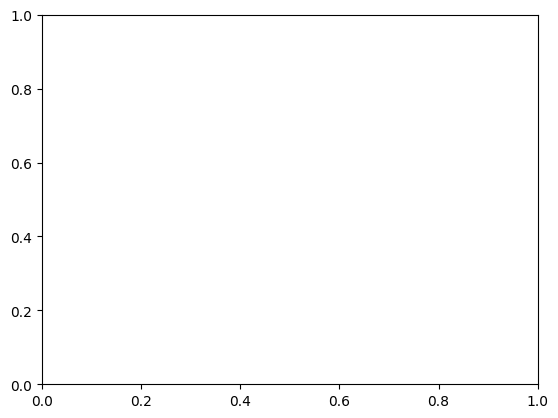

In [94]:
# APARTADO B)

fig2, ax = plt.subplots()

In [95]:
# Generamos un gráfico de dispersión sobre las medias y medianas en el formato requerido
ax.scatter(listado_medias, listado_medianas, color='cyan', marker='s')

# Delimitamos los ejes X e Y a valores entre [-1000,1000]
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)

# Añadimos títulos a los ejes
ax.set_xlabel("Media")
ax.set_ylabel("Mediana")
ax.set_title("Gráfico de Dispersión (Sin filtrar)")

Text(0.5, 1.0, 'Gráfico de Dispersión (Sin filtrar)')

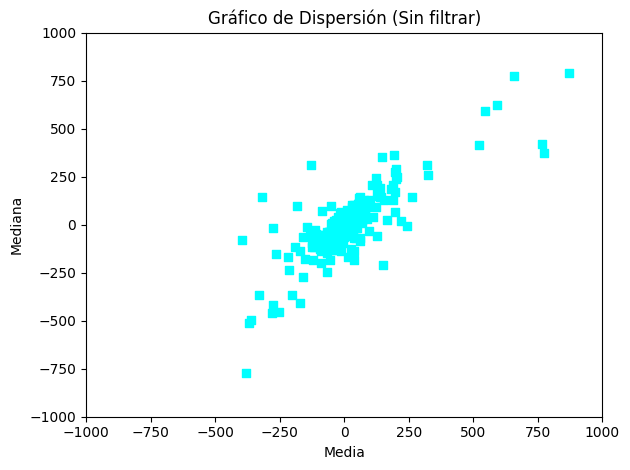

In [96]:
fig2.tight_layout()
fig2

In [97]:
# APARTADO C)

# Creamos el Dataframe introduciendo como columnas nuestras listas
df = pd.DataFrame({
    'Media': listado_medias,
    'Mediana': listado_medianas
})

# Hacemos un filtrado en el dataframe para los valores requeridos
df_mod = df[(df['Mediana'] < 500) & (df['Mediana'] > -500) & (df['Media'] > -500) & (df['Media'] < 500)]

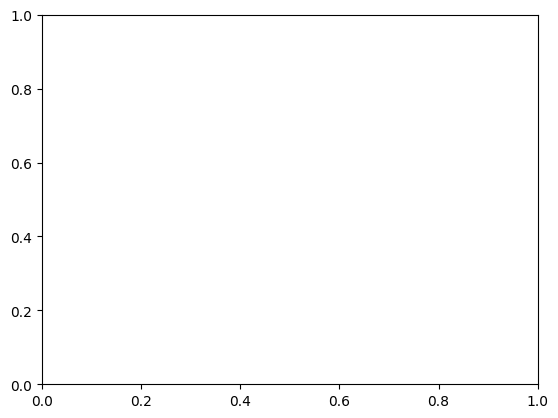

In [98]:
fig3, ax3 = plt.subplots()

In [99]:
# Generamos un gráfico de dispersión sobre las nuevas medias y medianas en el formato requerido
ax3.scatter(df_mod['Media'], df_mod['Mediana'], color='cyan', marker='s')

# Delimitamos los ejes X e Y a valores entre [-1000,1000]
ax3.set_xlim(-1000, 1000)
ax3.set_ylim(-1000, 1000)

# Añadimos títulos a los ejes
ax3.set_xlabel("Media")
ax3.set_ylabel("Mediana")
ax3.set_title("Gráfico de Dispersión con valores limitados entre -500 y 500")

Text(0.5, 1.0, 'Gráfico de Dispersión con valores limitados entre -500 y 500')

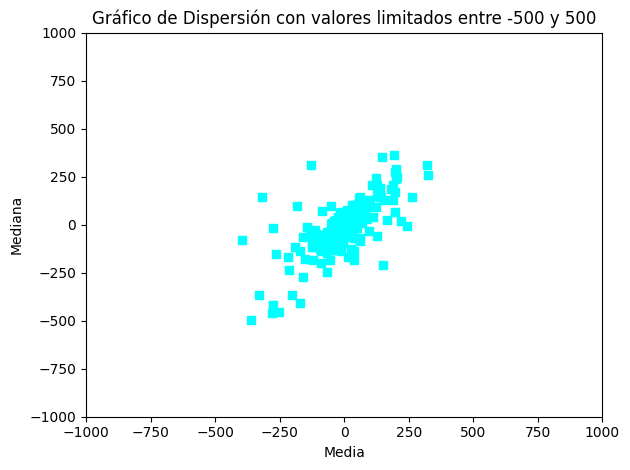

In [100]:
fig3.tight_layout()
fig3

In [101]:
# APARTADO D)

# Hacemos una copia del dataframe original y modificamos aquellos valores
# con media y mediana por encima de 500 y los ajustamos a 500

df_new = df.copy()

# NOTA: Es importante saber que debemos modificar únicamente la columna 'Media'
# si encontramos un valor de 'Media' mayor que 500 e igual ocurre con 'Mediana'

df_new.loc[df_new['Media'] > 500, 'Media'] = 500

df_new.loc[df_new['Mediana'] > 500, 'Mediana'] = 500

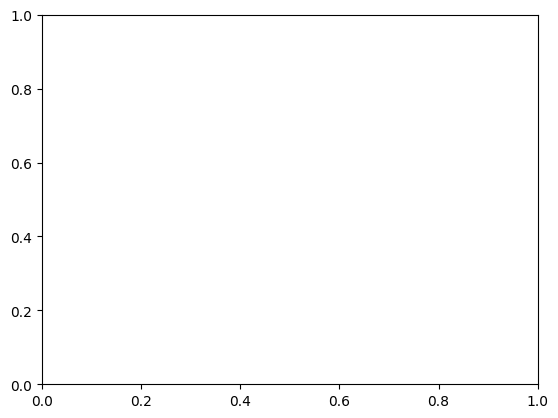

In [102]:
fig4, ax4 = plt.subplots()

In [103]:
# Generamos un gráfico de dispersión sobre las nuevas medias y medianas en el formato requerido
ax4.scatter(df_new['Media'], df_new['Mediana'], color = "blue", marker="v")

# Delimitamos los ejes X e Y a valores entre [-1000,1000]
ax4.set_xlim(-1000, 1000)
ax4.set_ylim(-1000, 1000)

# Añadimos títulos a los ejes
ax4.set_xlabel("Media")
ax4.set_ylabel("Mediana")
ax4.set_title("Gráfico de Dispersión con valores limitados a 500")

Text(0.5, 1.0, 'Gráfico de Dispersión con valores limitados a 500')

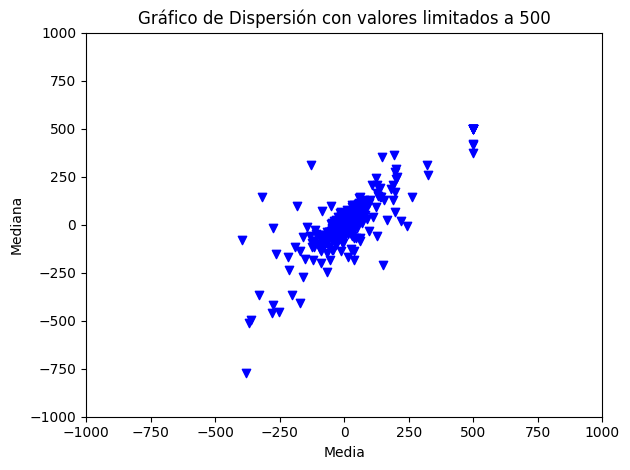

In [104]:
fig4.tight_layout()
fig4

## Ejercicio Experto

5. En este ejercicio generaremos dos fractales, y los dibujaremos mediante la biblioteca matplotlib.

    **a)** Considera la función mandelbrot, que dado un punto sobre el plano de los números complejos, devuelve un número entre 0 y 255 que se corresponde con un nivel de gris de la gráfica del fractal de Mandelbrot. Sus entradas son a (la parte real del número complejo) y b (parte imaginaria del número complejo).
    
    Diseña una nueva función mandelbrot_matriz para crear un array bidimensional de numpy que contenga una región rectangular del fractal de Mandelbrot. Dicha función debe aceptar los siguientes argumentos:

    ```
    inicio_a = Valor inicial para a
    fin_a = Valor final para a
    num_a = Cantidad de valores para a
    inicio_b = Valor inicial para b
    fin_b = Valor final para b
    num_b = Cantidad de valores para b
    ```

    Por último, genera un mapa de calor que muestre la región del fractal de Mandelbrot correspondientes a los siguientes valores: inicio_a = -2, fin_a = 1, num_a = 600, inicio_b = -1, fin_b = 1, num_b = 400
    
    El eje horizontal debe mostrar marcas entre -1 y 1, mientras que el eje vertical debe mostrar marcas entre -2 y 1. El mapa de color que debe utilizarse es 'viridis'.

    **b)** Considera los polinomios de Littlewood:
    
    https://en.wikipedia.org/wiki/Littlewood_polynomial


    Se trata de polinomios cuyos coeficientes sólo pueden ser -1 o 1. Genera 10000 polinomios de Littlewood de grado 12 al azar. Debes almacenar todas las soluciones de todos esos polinomios. A continuación, crea un histograma bidimensional que muestre la distribución de dichas soluciones en el plano de los números complejos. Debes ajustar el valor máximo mostrado en el histograma de manera que se observe claramente el fractal que se forma. Añade etiquetas en ambos ejes.

    *Pistas: Debes usar numpy.roots y matplotlib.pyplot.hist2d*

In [105]:
# APARTADO A)

def mandelbrot_matriz(inicio_a, fin_a, num_a, inicio_b, fin_b, num_b):
    """
    Genera una matriz que representa el conjunto de Mandelbrot.

    Usa operaciones vectorizadas para calcular las iteraciones
    necesarias para que la sucesión z = z^2 + c diverja.

    Args:
        inicio_a (float): Límite inferior de la parte real (Eje X).
        fin_a (float): Límite superior de la parte real (Eje X).
        num_a (int): Número de puntos en el eje real.
        inicio_b (float): Límite inferior de la parte imaginaria (Eje Y).
        fin_b (float): Límite superior de la parte imaginaria (Eje Y).
        num_b (int): Número de puntos en el eje imaginario.

    Returns:
        np.ndarray: Matriz 2D con valores float entre 0.0 y 255.0.
    """

    a_values = np.linspace(inicio_a, fin_a, num_a)  # Valores para filas
    b_values = np.linspace(inicio_b, fin_b, num_b)  # Valores para columnas

    # Generamos una rejilla para poder hacer operaciones vectorizadas
    A, B = np.meshgrid(a_values, b_values)

    # Forma Compleja
    C = A + 1j * B

    Z = np.zeros_like(C)
    imagen = np.zeros(C.shape)
    mascara = np.ones(C.shape, dtype=bool) # Puntos que aún no han divergido

    max_iter = 50

    # Construimos mediante sucesiones el conjunto de Mandelbrot

    for i in range(max_iter):

        Z[mascara] = Z[mascara]**2 + C[mascara]

        divergidos = np.abs(Z) > 2

        divergidos_ahora = divergidos & mascara
        imagen[divergidos_ahora] = (i / max_iter) * 255

        mascara[divergidos] = False

    return imagen

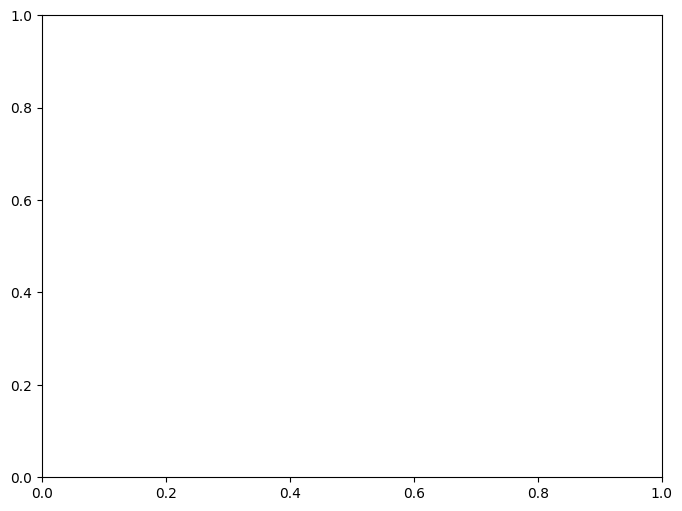

In [106]:
mapa_mandelbrot = mandelbrot_matriz(-2, 1, 600, -1, 1, 400)

fig_mb, ax_mb = plt.subplots(figsize=(8, 6))

In [107]:
# En este caso, al contrario que como se nos pide, he definido el eje X
# ('eje real') entre [-2, 1] y el eje Y ('eje complejo') entre [-1, 1] ya
# que es como generalmente se representa el plano complejo

ax_mb.imshow(mapa_mandelbrot, cmap='viridis', extent=[-2, 1, -1, 1])
ax_mb.set_xlabel("Parte Real (a) [-2, 1]")
ax_mb.set_ylabel("Parte Imaginaria (b) [-1, 1]")
ax_mb.set_title("Fractal de Mandelbrot")

Text(0.5, 1.0, 'Fractal de Mandelbrot')

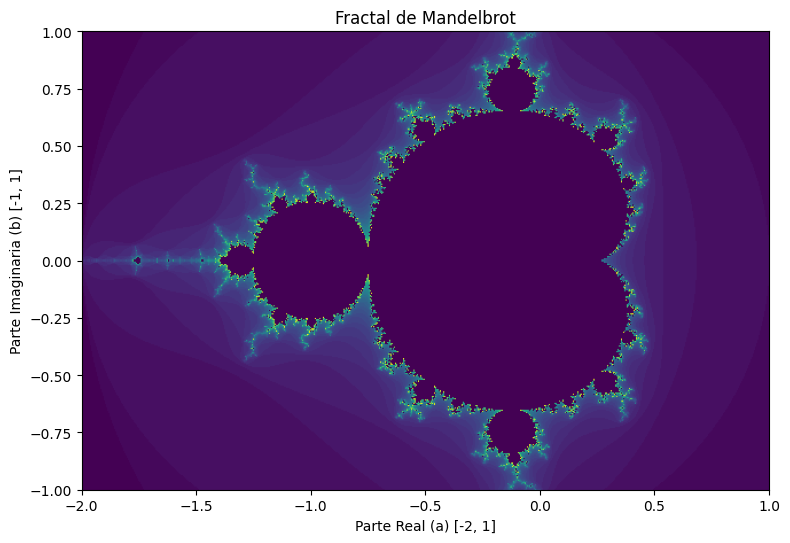

In [108]:
fig_mb.tight_layout()
fig_mb

In [109]:
# APARTADO B)

# Inicializamos un array donde guardaremos las raices de cada polinomio generado

todas_las_raices = []

for _ in range(10000):

    # Size = 13 pues um polinomio de grado 12 tiene 13 coeficientes (no
    # olvidar el término independiente)
    coeffs = np.random.choice([-1, 1], size=13)

    # Calculamos las raíces usando np.roots() y las guardamos en el array
    raices = np.roots(coeffs)
    todas_las_raices.extend(raices)

# Obtenemos la parte real e imaginaria de las raíces calculadas para su representación
todas_las_raices = np.array(todas_las_raices)
reales = todas_las_raices.real
imaginarios = todas_las_raices.imag

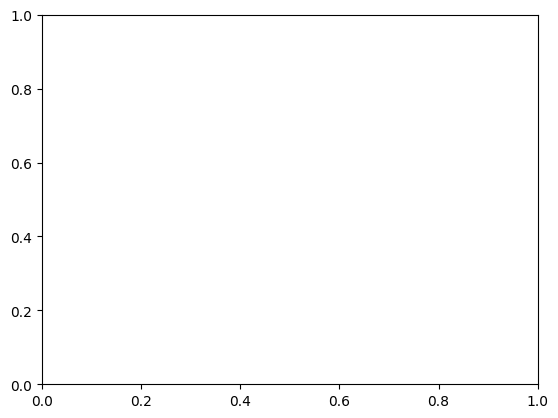

In [110]:
fig_lw, ax_lw = plt.subplots()

In [111]:
# Fijo el parámetro vmax = 60 para aquellos valores de la recta real dejen de
# influir tanto en la representación del fractal y uso el cmap hot

ax_lw.hist2d(reales, imaginarios, bins = 100, cmap ='hot',range=[[-2, 2], [-2, 2]], vmax= 60)

ax_lw.set_title(f"Fractal de Littlewood (Raíces de 10000 polinomios)")
ax_lw.set_xlabel("Parte Real")
ax_lw.set_ylabel("Parte Imaginaria")

ax_lw.axis('equal')

(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

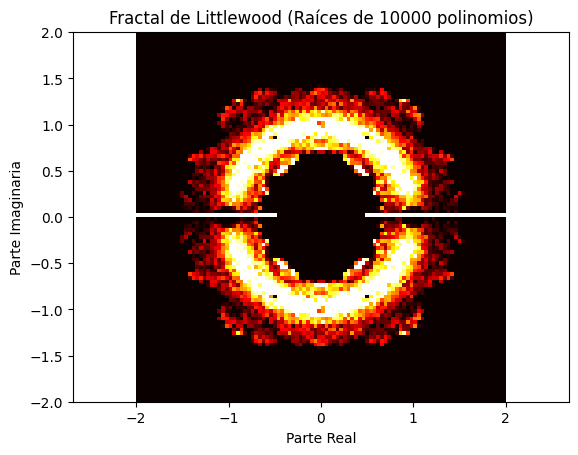

In [112]:
fig_lw